In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from rosbags.rosbag2 import Reader
from rosbags.serde import deserialize_cdr
from rosbags.highlevel import AnyReader

import numpy as np

In [2]:
def get_pose_data(bag_path, topic_name):
    poses_data = {
        'timestamp': [],
        'time_sec': [],
        'position': {
            'x': [],
            'y': [],
            'z': []
        },
        'orientation': {
            'x': [],
            'y': [],
            'z': [],
            'w': []
        },
        # 'covariance': []
    }

    with AnyReader([bag_path]) as reader:
        # Print bag info
        print(f"Bag duration: {reader.duration / 1e9:.2f} seconds")
        print(f"Message count: {reader.message_count}")

        connection = [x for x in reader.connections if x.topic == topic_name]

        # Read messages
        for connection, timestamp, rawdata in reader.messages(connections=connection):
            msg = reader.deserialize(rawdata, connection.msgtype)

            # Extract pose data
            poses_data['timestamp'].append(timestamp)
            poses_data['time_sec'].append(timestamp / 1e9)

            poses_data['position']['x'].append(msg.position.x)
            poses_data['position']['y'].append(msg.position.y)
            poses_data['position']['z'].append(msg.position.z)

            poses_data['orientation']['x'].append(msg.orientation.x)
            poses_data['orientation']['y'].append(msg.orientation.y)
            poses_data['orientation']['z'].append(msg.orientation.z)
            poses_data['orientation']['w'].append(msg.orientation.w)

            # poses_data['covariance'].append(msg.pose.covariance)

    # poses_data['covariance'] = np.array(poses_data['covariance'])
    # print(f"Read {len(poses_data)} pose messages")
    return poses_data

def get_force_data(bag_path, topic_name):
    force_data = {
        'timestamp': [],
        'time_sec': [],
        'data': []
    }
    with AnyReader([bag_path]) as reader:
        # Print bag info
        print(f"Bag duration: {reader.duration / 1e9:.2f} seconds")
        print(f"Message count: {reader.message_count}")

        connection = [x for x in reader.connections if x.topic == topic_name]

        # Read messages
        for connection, timestamp, rawdata in reader.messages(connections=connection):
            msg = reader.deserialize(rawdata, connection.msgtype)
            force_data['timestamp'].append(timestamp)
            force_data['time_sec'].append(timestamp / 1e9)
            force_data['data'].append(msg.data)

    return force_data




def plot_displacements_over_time(timestamps, monica_poses, ross_poses):
    displacements = ross_poses - monica_poses
    plt.plot(
        timestamps,
        displacements,
        '-r'
    )
    plt.legend(['monica', 'ross'])
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Trajectory over time for monica and ross')
    plt.show()

def plot_force_data(timestamps, force_data):
    plt.plot(
        timestamps,
        force_data,
        '-r'
    )
    plt.grid(True)
    plt.xlabel('t')
    plt.ylabel('force (N)')
    plt.title('Force readings over time')
    plt.show()

Bag duration: 49.49 seconds
Message count: 101001


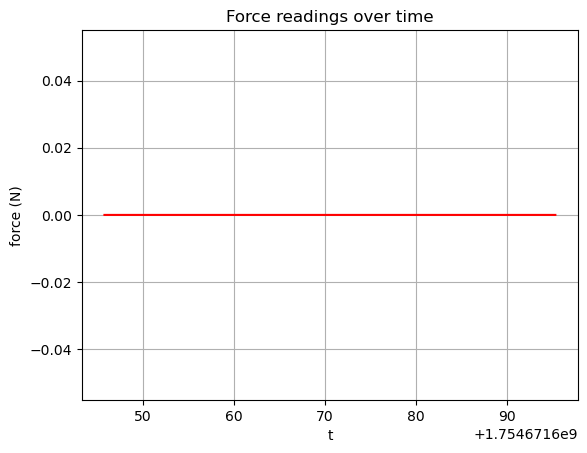

In [5]:
bag_path = Path('../../../datasets/vicon_data/vicon_test_1')

force_data = get_force_data(bag_path, '/monica/force')

plot_force_data(force_data['time_sec'], force_data['data'])